# –°–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Ç–µ–∫—Å—Ç–æ–≤

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd
import numpy as np
import json
import re

import bz2
from tqdm import tqdm
tqdm.pandas()

In [2]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:52, 3831.10it/s]


In [3]:
data = pd.DataFrame(responses)

data.head()

city  rating_not_checked  \
0       –≥. –ú–æ—Å–∫–≤–∞               False   
1  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫               False   
2       –≥. –ú–æ—Å–∫–≤–∞               False   
3   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å               False   
4    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫               False   

                                               title  num_comments  \
0                                             –ñ–∞–ª–æ–±–∞             0   
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω             0   
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.             1   
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...             2   
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É             1   

      bank_license       author        bank_name             datetime  \
0  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562       uhnov1          –ë–∏–Ω–±–∞–Ω–∫  2015-06-08 12:50:54   
1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481       Foryou  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-08 11:09:57   
2  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562   Vladimir84          –ë–∏–Ω–±–∞–Ω–∫  2015-06-05 20:14:28   
3  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481       643609  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-05 13:51:01   
4  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  anfisa-2003         –û–¢–ü –ë–∞–Ω–∫  2015-06-05 10:58:12   

                                                text  rating_grade  
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...           NaN  
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...           NaN  
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...           NaN  
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...           NaN  
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...           NaN

In [4]:
data = data[data["rating_grade"].isin([1, 5])]

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è

In [5]:
from nltk.tokenize import sent_tokenize

In [6]:
full_texts = pd.DataFrame(columns=["index", "sentence_order", "sentence_text"])

for i, row in tqdm(data.iterrows()):
    text = row["text"]
    sentences = sent_tokenize(text)
    sentence_count = len(sentences)

    text_df = pd.DataFrame({
        "index": np.repeat(i, sentence_count),
        "sentence_order": np.arange(sentence_count),
        "sentence_text": sentences
    })

    full_texts = pd.concat([full_texts, text_df], axis=0)

62100it [20:59, 49.31it/s] 


### –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤

In [7]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymorphy3 import MorphAnalyzer

In [8]:
rus_stopwords = stopwords.words("russian")

In [9]:
morph = MorphAnalyzer()


def get_lemmas(text: str, morph=morph):
    text = text.lower()
    cleaned_text = re.sub(f'[{punctuation}]', "", text)
    tokens = word_tokenize(cleaned_text)
    tokens = [token for token in tokens if token not in rus_stopwords]
    lemmas = [morph.normal_forms(token)[0] for token in tokens]

    return " ".join(lemmas)

In [10]:
full_texts["sentence_text"] = full_texts["sentence_text"].progress_apply(get_lemmas)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1197494/1197494 [09:03<00:00, 2204.35it/s]


### –û–±—É—á–µ–Ω–∏–µ –∏ —Ç–µ—Å—Ç –º–æ–¥–µ–ª–∏ Word2Vec

In [11]:
from gensim.models import Word2Vec

In [12]:
def get_tokens(text):
    return word_tokenize(text)


full_texts["tokens"] = full_texts["sentence_text"].apply(get_tokens)

In [13]:
model = Word2Vec(sentences=full_texts["tokens"], vector_size=100, window=5, min_count=1, workers=4)

In [14]:
model.init_sims()

C:\Users\–†—É—Å–ª–∞–Ω\AppData\Local\Temp\ipykernel_19920\3100270657.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [15]:
model.save("my_word2vec_model.model")

#### –¢–µ—Å—Ç –Ω–∞ –ø–æ–∏—Å–∫ –ø–æ—Ö–æ–∂–∏—Ö —Å–ª–æ–≤

In [16]:
model.wv.most_similar("–¥–µ–Ω—å") # –•–æ—Ä–æ—à–∏–π –ø—Ä–∏–º–µ—Ä

[('–Ω–µ–¥–µ–ª—è', 0.7209892272949219),
 ('–º–µ—Å—è—Ü', 0.7087016701698303),
 ('—Å—É—Ç–∫–∏', 0.6924532651901245),
 ('—á–∞—Å', 0.5764643549919128),
 ('–º–∏–Ω—É—Ç–∞', 0.5705773234367371),
 ('–≤–µ—á–µ—Ä', 0.48651358485221863),
 ('–º–∏–Ω–∞', 0.46908092498779297),
 ('—É—Ç—Ä–æ', 0.4652181565761566),
 ('–ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫', 0.4625767171382904),
 ('–≥–æ–¥', 0.46181049942970276)]

In [17]:
model.wv.most_similar("–±–∞–Ω–∫") # –•–æ—Ä–æ—à–∏–π –ø—Ä–∏–º–µ—Ä (—Ö–æ—Ç—è –µ—Å—Ç—å –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ—Å—Ç—å —Å –ø–æ—Å–ª–µ–¥–Ω–∏–º–∏ —Å–ª–æ–≤–∞–º–∏)

[('—Å–±–µ—Ä–±–∞–Ω–∫', 0.6840847134590149),
 ('—Å–∏—Ç–∏–±–∞–Ω–∫', 0.6732875108718872),
 ('–∞–ª—å—Ñ–∞–±–∞–Ω–∫–∞', 0.6326536536216736),
 ('—Ä–æ—Å–±–∞–Ω–∫', 0.6246004104614258),
 ('—Å–±–µ—Ä', 0.5960267782211304),
 ('—Ç–∞–∫–∂–µ', 0.582491934299469),
 ('–∫–æ–º–ø–∞–Ω–∏—è', 0.5608768463134766),
 ('–≤–∞—à', 0.5546275973320007),
 ('—Ö–æ—Ç—è', 0.552590548992157),
 ('–∫–æ—Ç–æ—Ä—ã–π', 0.5507922768592834)]

In [18]:
model.wv.most_similar("–∏–Ω—Ñ–ª—è—Ü–∏—è") # –ü–ª–æ—Ö–æ–π –ø—Ä–∏–º–µ—Ä

[('—Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ', 0.7042920589447021),
 ('–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç', 0.6538717746734619),
 ('–ø–æ–¥—Å–ø–æ—Ä—å–µ', 0.6482155919075012),
 ('–ø–µ—Ä–µ–≤–µ–ª–æ—Å—å‚Ä¶', 0.6456987857818604),
 ('—Ä–µ–Ω—Ç–∞–±–µ–ª—å–Ω–æ—Å—Ç—å', 0.6444392800331116),
 ('–∏–Ω–≤–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ', 0.6429957747459412),
 ('–∫–æ—Ä–º–∏–ª–µ—Ü', 0.641840934753418),
 ('mosprime', 0.6418331861495972),
 ('—É—Å—Ç–∞–≤–∫–∞–ø–∏—Ç–∞–ª', 0.635029137134552),
 ('–¥—Ä–æ–∂–∂–∏', 0.6335232257843018)]

In [19]:
model.wv.most_similar("–¥–æ–≥–æ–≤–æ—Ä") # –ü–ª–æ—Ö–æ–π –ø—Ä–∏–º–µ—Ä

[('—Å–æ–≥–ª–∞—à–µ–Ω–∏–µ', 0.7345297932624817),
 ('–∫–æ–Ω—Ç—Ä–∞–∫—Ç', 0.7293655276298523),
 ('–¥–æ–ø—Å–æ–≥–ª–∞—à–µ–Ω–∏–µ', 0.7227081656455994),
 ('—É–¥–±—ã–π', 0.6052708625793457),
 ('–∫–¥', 0.5998002886772156),
 ('077219717', 0.5827078223228455),
 ('250513–≥', 0.5528532266616821),
 ('–ø–æ–ª–∏—Å', 0.5520756244659424),
 ('–¥–º–µ–¥–≤–µ–¥–µ–≤', 0.5505146384239197),
 ('90550377', 0.5458100438117981)]

#### –¢–µ—Å—Ç –Ω–∞ –∞–Ω–∞–ª–æ–≥–∏

In [20]:
# –ü—Ä–∏–º–µ—Ä –∞–Ω–∞–ª–æ–≥–∏–∏
analogy = model.wv.most_similar(positive=['—Å–±–µ—Ä–µ–∂–µ–Ω–∏–µ', '–∫—Ä–µ–¥–∏—Ç'], negative=['–¥–æ–ª–≥'], topn=5)

print(analogy)

[('–Ω–∞–∫–æ–ø–ª–µ–Ω–∏–µ', 0.5913645029067993), ('–º–µ—á—Ç–∞', 0.5114480257034302), ('–∫—Ä–µ–¥–∏—Ç–æ–≤–∞—Ç—å', 0.5098973512649536), ('–∏–ø–æ—Ç–µ–∫–∞', 0.5088470578193665), ('–Ω—É–∂–¥–∞', 0.5069460868835449)]


In [21]:
# –ü—Ä–∏–º–µ—Ä –∞–Ω–∞–ª–æ–≥–∏–∏
analogy = model.wv.most_similar(positive=["–±–∞–Ω–∫", "—Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–π"], negative=["—É—á—Ä–µ–∂–¥–µ–Ω–∏–µ"], topn=5)

print(analogy)

[('–∫—Ä–µ–¥–∏—Ç–Ω—ã–π', 0.6046749949455261), ('–±–∞–Ω–∫–æ–≤—Å–∫–∏–π', 0.5537451505661011), ('—Ç–∞–∫–∂–µ', 0.5281783938407898), ('–≤–∞—à', 0.49628373980522156), ('–Ω–µ–≥–∏–±–∫–∏–π', 0.4939434230327606)]


In [22]:
# –ü—Ä–∏–º–µ—Ä –∞–Ω–∞–ª–æ–≥–∏–∏
analogy = model.wv.most_similar(positive=["—Å–æ—Ç—Ä—É–¥–Ω–∏–∫", "–±–∞–Ω–∫"], negative=["—Ñ–∏–Ω–∞–Ω—Å—ã"], topn=5)

print(analogy)

[('—Å–æ—Ç—Ä—É–¥–Ω–∏—Ü–∞', 0.5943720936775208), ('–æ–ø–µ—Ä–∞—Ç–æ—Ä', 0.5779834389686584), ('–æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–∏—Å—Ç', 0.5556332468986511), ('–¥–µ–≤—É—à–∫–∞', 0.5444627404212952), ('—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç', 0.5251325368881226)]


In [23]:
# –ü—Ä–∏–º–µ—Ä –∞–Ω–∞–ª–æ–≥–∏–∏
analogy = model.wv.most_similar(positive=["–∫–ª–∏–µ–Ω—Ç"], negative=["–≤–∫–ª–∞–¥"], topn=5)

print(analogy)

[('–ø–ª–∞—Ç–µ–ª—å—â–∏–∫', 0.49186137318611145), ('httpwwwbankiruservicesresponsesbankid193284', 0.4590560793876648), ('—Ö–∞–ª–∞—Ç–Ω—ã–π', 0.4455386698246002), ('–¥–æ–ª–∂–Ω–∏–∫', 0.4428364038467407), ('2014110333010054', 0.44094035029411316)]


#### –¢–µ—Å—Ç –Ω–∞ –ø–æ–∏—Å–∫ –ª–∏—à–Ω–µ–≥–æ —Å–ª–æ–≤–∞

In [24]:
model.wv.doesnt_match(["–¥–æ–ª–ª–∞—Ä", "—Ä—É–±–ª—å", "–µ–≤—Ä–æ", "–±–∞–Ω–∫"]) # –•–æ—Ä–æ—à–∏–π –ø—Ä–∏–º–µ—Ä

'–±–∞–Ω–∫'

In [25]:
model.wv.doesnt_match(["–¥–æ–ª–≥", "–∫—Ä–µ–¥–∏—Ç", "–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç—å", "–≤—ã–ø–ª–∞—Ç–∞"]) # –•–æ—Ä–æ—à–∏–π –ø—Ä–∏–º–µ—Ä

'–≤—ã–ø–ª–∞—Ç–∞'

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

#### –¢–æ–ø 100 —Å–ª–æ–≤

In [26]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

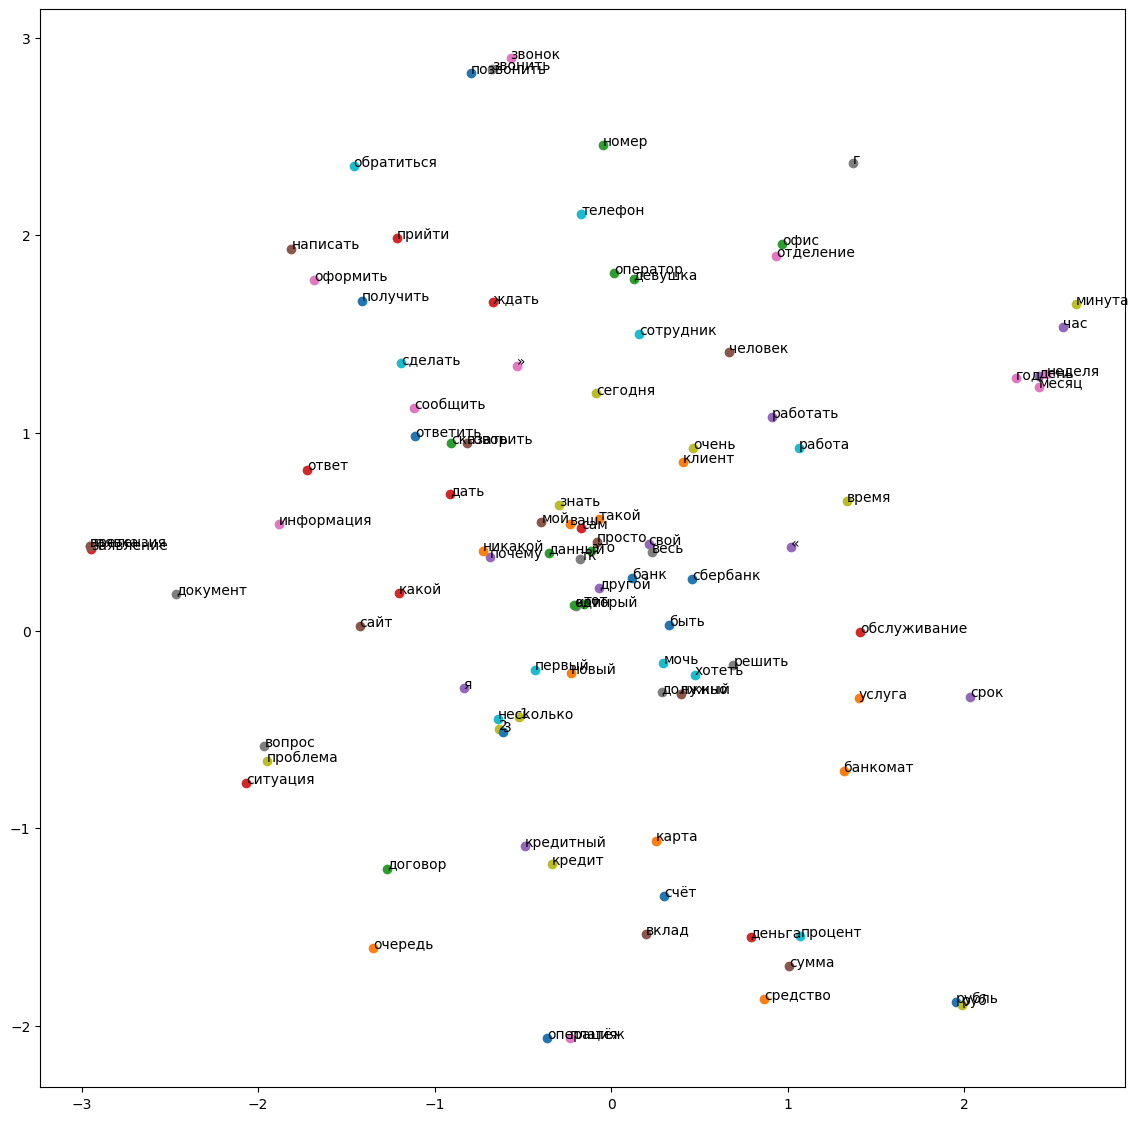

In [27]:
top_words = model.wv.index_to_key[:100]

top_vectors = [model.wv[word] for word in top_words]
top_vectors = np.array(top_vectors)

tsne = TSNE(n_components=2, perplexity=50, n_iter=3000, random_state=42)
word_vectors_2d = tsne.fit_transform(top_vectors)

plt.figure(figsize=(14, 14))
for i, word in enumerate(word_vectors_2d):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(top_words[i], (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

In [28]:
kmeans = KMeans(n_clusters=8, random_state=42) # –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
kmeans_labels = kmeans.fit_predict(word_vectors_2d)

c:\Users\–†—É—Å–ª–∞–Ω\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
kmeans_labels

array([7, 5, 7, 4, 2, 7, 6, 7, 5, 6, 5, 6, 7, 3, 7, 4, 2, 3, 0, 0, 1, 7,
       6, 3, 5, 5, 5, 1, 6, 1, 1, 0, 5, 7, 6, 1, 2, 3, 3, 6, 0, 7, 1, 1,
       0, 7, 1, 0, 5, 0, 4, 4, 7, 3, 7, 6, 1, 0, 2, 1, 0, 5, 7, 0, 0, 7,
       3, 3, 7, 1, 5, 0, 6, 1, 7, 3, 2, 6, 6, 7, 5, 7, 7, 7, 2, 3, 1, 7,
       5, 4, 1, 7, 6, 7, 7, 0, 1, 7, 4, 5])

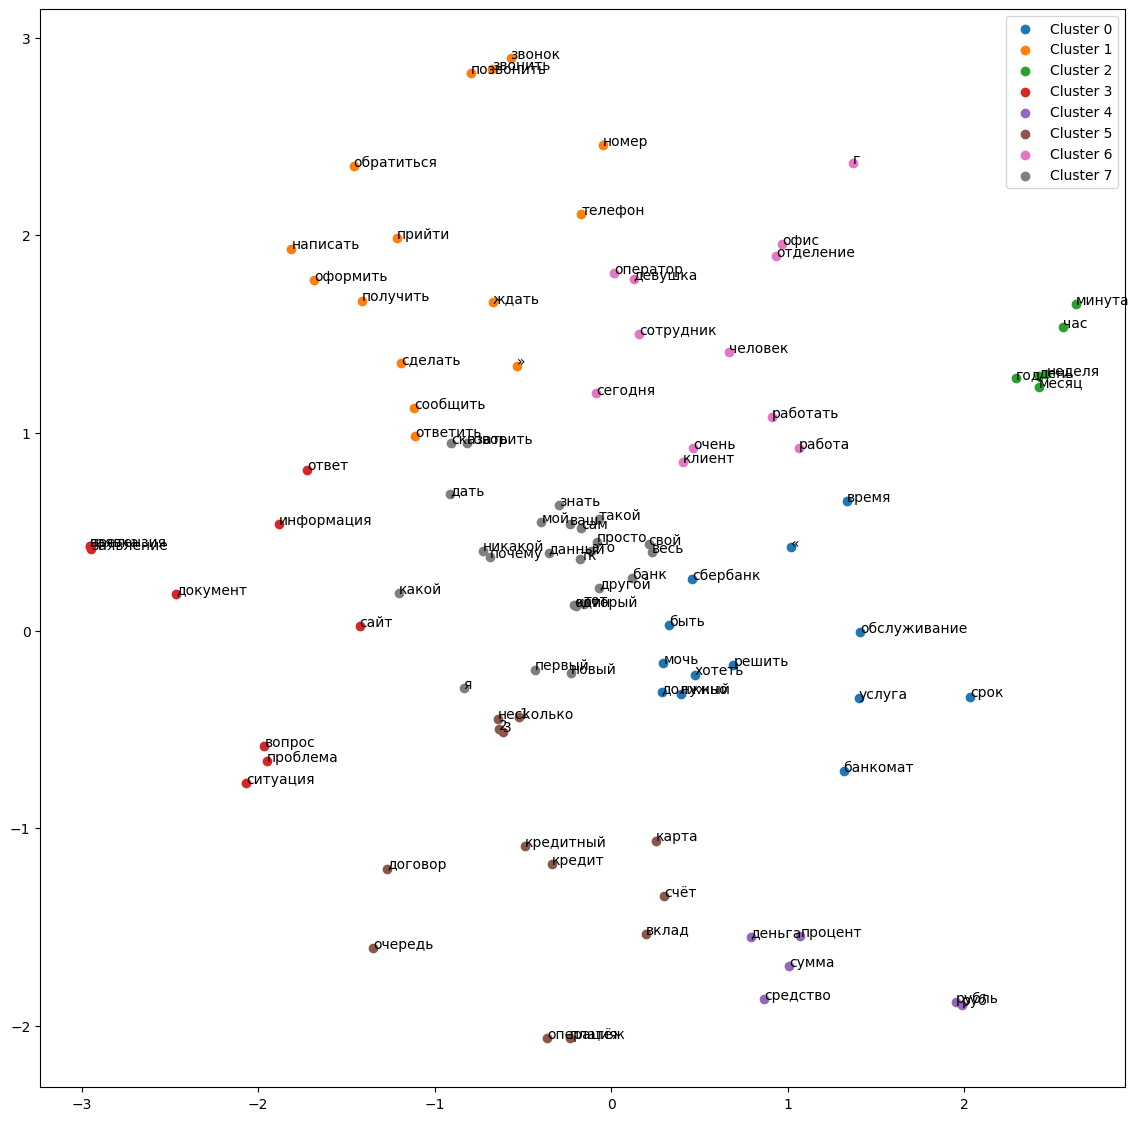

In [30]:
unique_labels = np.unique(kmeans_labels)

plt.figure(figsize=(14, 14))
for label in unique_labels:
    indices = np.where(kmeans_labels == label)[0]
    x_coords = word_vectors_2d[indices, 0]
    y_coords = word_vectors_2d[indices, 1]
    words = [top_words[i] for i in indices]
    plt.scatter(x_coords, y_coords, label=f'Cluster {label}')
    for i, word in enumerate(words):
        plt.annotate(word, (x_coords[i], y_coords[i]))


plt.legend() # –¥–æ–±–∞–≤–∏—Ç—å –ª–µ–≥–µ–Ω–¥—É
plt.show()

* –ö–ª–∞—Å—Ç–µ—Ä 0 - —É—Å–ª—É–≥–∞/—Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã
* –ö–ª–∞—Å—Ç–µ—Ä 1 - —á–∞—Å—Ç—ã–µ –≥–ª–∞–≥–æ–ª—ã, —Ñ–∏–≥—É—Ä–∏—Ä—É—é—â–∏–µ –≤ –±–∞–Ω–∫–æ–≤—Å–∫–æ–º –¥–µ–ª–µ
* –ö–ª–∞—Å—Ç–µ—Ä 2 - –≤—Ä–µ–º—è
* –ö–ª–∞—Å—Ç–µ—Ä 3 - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è/–ø—Ä–æ–±–ª–µ–º–∞
* –ö–ª–∞—Å—Ç–µ—Ä 4 - —Å–≤—è–∑–∞–Ω–Ω–æ —Å –¥–µ–Ω—å–≥–∞–º–∏
* –ö–ª–∞—Å—Ç–µ—Ä 5 - —Å–≤—è–∑–∞–Ω–Ω–æ —Å–æ —Å—á—ë—Ç–æ–º –≤ –±–∞–Ω–∫–µ
* –ö–ª–∞—Å—Ç–µ—Ä 6 - —á–∞—Å—Ç–æ —Ñ–∏–≥—É—Ä–∏—Ä—É—é—â–∏–µ —Å–ª–æ–≤–∞, –Ω–µ –ø—Ä–∏–≤—è–∑–∞–Ω–Ω—ã–µ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
* –ö–ª–∞—Å—Ç–µ—Ä 7 - —á–∞—Å—Ç–æ —Ñ–∏–≥—É—Ä–∏—Ä—É—é—â–∏–µ —Å–ª–æ–≤–∞, –Ω–µ –ø—Ä–∏–≤—è–∑–∞–Ω–Ω—ã–µ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏

#### "–•–æ—Ä–æ—à–µ—Å—Ç—å" –∏ "—Å–∫–æ—Ä–æ—Å—Ç—å" –±–∞–Ω–∫–æ–≤

In [31]:
model.wv.most_similar("–±–∞–Ω–∫", topn=30) # –¥–ª—è –≤—ã–±–æ—Ä–∞ –±–∞–Ω–∫–æ–≤

[('—Å–±–µ—Ä–±–∞–Ω–∫', 0.6840847134590149),
 ('—Å–∏—Ç–∏–±–∞–Ω–∫', 0.6732875108718872),
 ('–∞–ª—å—Ñ–∞–±–∞–Ω–∫–∞', 0.6326536536216736),
 ('—Ä–æ—Å–±–∞–Ω–∫', 0.6246004104614258),
 ('—Å–±–µ—Ä', 0.5960267782211304),
 ('—Ç–∞–∫–∂–µ', 0.582491934299469),
 ('–∫–æ–º–ø–∞–Ω–∏—è', 0.5608768463134766),
 ('–≤–∞—à', 0.5546275973320007),
 ('—Ö–æ—Ç—è', 0.552590548992157),
 ('–∫–æ—Ç–æ—Ä—ã–π', 0.5507922768592834),
 ('–æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è', 0.5338826775550842),
 ('—Å–≤–æ–π', 0.5267523527145386),
 ('–∏–º–µ–Ω–Ω–æ', 0.523812472820282),
 ('–º–∫–±', 0.5236334204673767),
 ('–¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ', 0.5231325030326843),
 ('–∞–ª—å—Ñ', 0.5210378170013428),
 ('—Ä–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫', 0.5192226767539978),
 ('–ø–æ—Å–∫–æ–ª—å–∫—É', 0.5114973783493042),
 ('–º–æ—á—å', 0.5025551319122314),
 ('–ø–æ—ç—Ç–æ–º—É', 0.497526615858078),
 ('–≤—Ç–±24', 0.4969906210899353),
 ('–∫–ª–∏–µ–Ω—Ç', 0.4948118031024933),
 ('–∞–ª—å—Ñ–∞–±–∞–Ω–∫', 0.4936223328113556),
 ('–æ–¥–∏–Ω', 0.48117148876190186),
 ('—Ç–∫', 0.4788951873779297),


In [32]:
def get_coordinates(word, model=model):
    good_bad_vector = model.wv["—Ö–æ—Ä–æ—à–∏–π"] - model.wv["–ø–ª–æ—Ö–æ–π"]
    fast_slow_vector = model.wv["–±—ã—Å—Ç—Ä—ã–π"] - model.wv["–º–µ–¥–ª–µ–Ω–Ω—ã–π"]

    word_vector = model.wv[word]
    coordinate_1 = np.dot(word_vector, good_bad_vector)
    coordinate_2 = np.dot(word_vector, fast_slow_vector)

    return np.array([coordinate_1, coordinate_2])

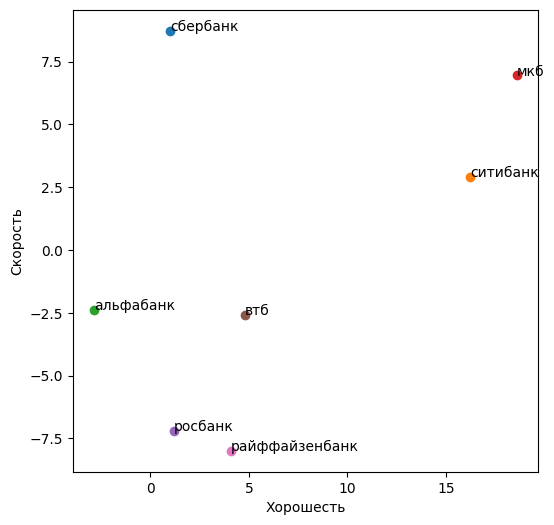

In [33]:
banks = ["—Å–±–µ—Ä–±–∞–Ω–∫", "—Å–∏—Ç–∏–±–∞–Ω–∫", "–∞–ª—å—Ñ–∞–±–∞–Ω–∫", "–º–∫–±", "—Ä–æ—Å–±–∞–Ω–∫", "–≤—Ç–±", "—Ä–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫"]

plt.figure(figsize=(6, 6))
for i, bank in enumerate(banks):
    coordinates = get_coordinates(bank)
    plt.scatter(coordinates[0], coordinates[1])
    plt.annotate(bank, (coordinates[0], coordinates[1]))
plt.xlabel("–•–æ—Ä–æ—à–µ—Å—Ç—å")
plt.ylabel("–°–∫–æ—Ä–æ—Å—Ç—å")
plt.show()

–í–∏–¥–∏–º, —á—Ç–æ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º "—Å–∫–æ—Ä–æ—Å—Ç–∏" –∏ "—Ö–æ—Ä–æ—à–µ—Å—Ç–∏" –ª—É—á—à–∏–º –æ–∫–∞–∑–∞–ª—Å—è <b>–ú–ö–ë</b>, —Ö—É–¥—à–∏–º–∏ - <b>–†–æ—Å–±–∞–Ω–∫</b> –∏ <b>–ê–ª—å—Ñ–∞ –ë–∞–Ω–∫</b>

## –†–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–∫

In [183]:
positive_words = ["–±—ã—Å—Ç—Ä—ã–π", "—É–¥–æ–±–Ω—ã–π", "—Ö–æ—Ä–æ—à–∏–π", "—Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π", "–≤—ã–≥–æ–¥–Ω—ã–π", "–¥–æ—Å—Ç—É–ø–Ω—ã–π"]
negative_words = ["–º–µ–¥–ª–µ–Ω–Ω—ã–π", "–æ—á–µ—Ä–µ–¥—å", "—É–∂–∞—Å–Ω—ã–π", "–¥–æ–ª–≥–∏–π", "–ø–ª–æ—Ö–æ–π", "–Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–π"]

In [ ]:
import numpy as np
from sklearn.semi_supervised import LabelSpreading

word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])

labels = np.zeros(len(model.wv))


positive_indexes = [model.wv.key_to_index[word] for word in positive_words]
negative_indexes = [model.wv.key_to_index[word] for word in negative_words]

labels[positive_indexes] = 2
labels[negative_indexes] = 1

mask = labels != 0
X_train = word_vectors[mask]
y_train = labels[mask]


X_unlabeled = word_vectors[~mask]

lp_model = LabelSpreading(kernel="knn", n_neighbors=5)

lp_model.fit(X_train, y_train)

predicted_labels = lp_model.predict(word_vectors)


result = {word: label for word, label in zip(model.wv.index_to_key, predicted_labels)}

positive_new = [word for word, label in result.items() if label == 2]
negative_new = [word for word, label in result.items() if label == 1]

print("–ù–æ–≤—ã–µ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞:", positive_new)
print("–ù–æ–≤—ã–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞:", negative_new)

–ù–æ–≤—ã–µ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞: ['–∫–∞—Ä—Ç–∞', '–∫—Ä–µ–¥–∏—Ç', '—Å—á—ë—Ç', '–∑–∞—è–≤–ª–µ–Ω–∏–µ', '—Å—É–º–º–∞', '–≤–æ–ø—Ä–æ—Å', '–º–æ—á—å', '–ø–æ–ª—É—á–∏—Ç—å', '–∫—Ä–µ–¥–∏—Ç–Ω—ã–π', '–≤–∫–ª–∞–¥', '–ø–ª–∞—Ç—ë–∂', '–¥–∞—Ç—å', '–ø—Ä–∏–π—Ç–∏', '—Ä—É–±–ª—å', '—Å—Ä–µ–¥—Å—Ç–≤–æ', '—Å–¥–µ–ª–∞—Ç—å', '–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è', '–æ–±—Ä–∞—Ç–∏—Ç—å—Å—è', '–æ–ø–µ—Ä–∞—Ü–∏—è', '–ø–æ—á–µ–º—É', '1', '–ø—Ä–æ—Ü–µ–Ω—Ç', '–æ—Ç–≤–µ—Ç–∏—Ç—å', '–Ω—É–∂–Ω–æ', '–æ—Ñ–æ—Ä–º–∏—Ç—å', '—Ä—É–±', '–ø–µ—Ä–µ–≤–æ–¥', '–∫–æ–º–∏—Å—Å–∏—è', '—Å–º—Å', '–≤—ã–¥–∞—Ç—å', '—É—Å–ª–æ–≤–∏–µ', '–º–æ–º–µ–Ω—Ç', '—Ç–∞–∫–∂–µ', '–∫–∞—Å—Å–∞', '—Å–º–æ—á—å', '–ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å', '–Ω—É–∂–Ω—ã–π', '—Å–∏—Å—Ç–µ–º–∞', '–ø–æ–ø—Ä–æ—Å–∏—Ç—å', '–ø–æ–≥–∞—à–µ–Ω–∏–µ', '–¥–µ–Ω–µ–∂–Ω—ã–π', '–æ–ø–ª–∞—Ç–∞', '—Å–Ω—è—Ç—å', '000', '–ø–æ–ª—É—á–µ–Ω–∏–µ', '–ø–æ–ª—É—á–∞—Ç—å', '–ø–æ–¥–¥–µ—Ä–∂–∫–∞', '–æ—Ç–ø—Ä–∞–≤–∏—Ç—å', '–≤–Ω–µ—Å—Ç–∏', '–∫–∞—Ä—Ç–æ—á–∫–∞', '—Ö–æ—Ä–æ—à–∏–π', '–ø—Ä–æ—Å—å–±–∞', '–±–∞–Ω–∫–æ–≤—Å–∫–∏–π', '–ª–∏–º–∏—Ç', '–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å', '–±—ã

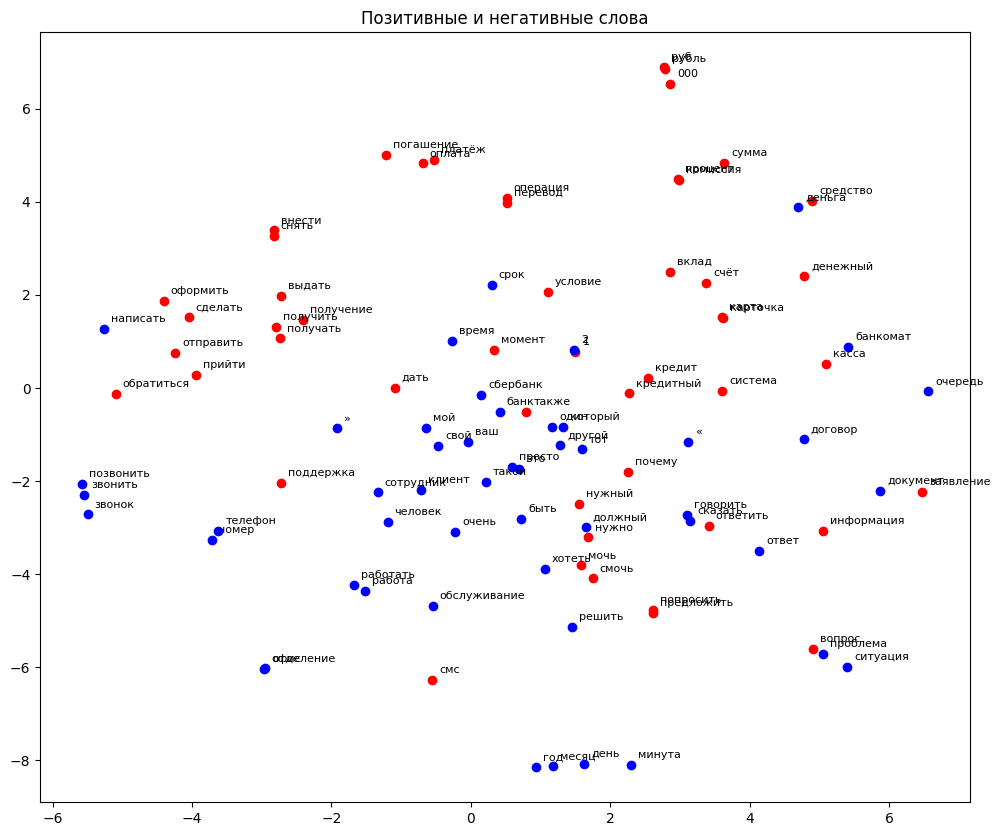

In [198]:
import random


def visualize_embeddings(embeddings, labels, words, num_words=50):

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    positive_indices = np.where(labels == 2)[0]
    negative_indices = np.where(labels == 1)[0]

    positive_sample = random.sample(list(positive_indices), min(num_words, len(positive_indices)))
    negative_sample = random.sample(list(negative_indices), min(num_words, len(negative_indices)))
    all_indices = positive_sample + negative_sample

    plt.figure(figsize=(12, 10))
    for i in all_indices:
        x, y = embeddings_2d[i, 0], embeddings_2d[i, 1]
        plt.scatter(x, y, c=['red' if labels[i] == 2 else 'blue'][0])
        plt.annotate(words[i], (x, y), fontsize=8, textcoords="offset points", xytext=(5, 5), ha='left')

    plt.title('–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞')
    plt.show()

positive_indices = np.where(predicted_labels == 2)[0]
negative_indices = np.where(predicted_labels == 1)[0]

positive_embeddings = word_vectors[positive_indices][:min(50, len(positive_indices))]
positive_words_subset = [model.wv.index_to_key[i] for i in positive_indices][:min(50, len(positive_indices))]

negative_embeddings = word_vectors[negative_indices][:min(50, len(negative_indices))]
negative_words_subset = [model.wv.index_to_key[i] for i in negative_indices][:min(50, len(negative_indices))]

all_embeddings = np.concatenate((positive_embeddings,negative_embeddings))
all_labels = np.concatenate((np.full(len(positive_embeddings),2), np.full(len(negative_embeddings),1)))
all_words = positive_words_subset + negative_words_subset

visualize_embeddings(all_embeddings, all_labels, all_words)